In [1]:
using Plots
using QuadGK
using FastGaussQuadrature

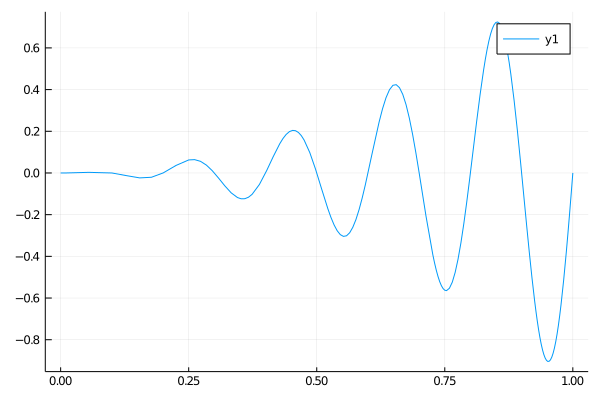

-0.03183098861837907

In [73]:
f(x) = x^2 * sin(10π*x)
display(plot(f, 0, 1))
answer = -1 /  10π

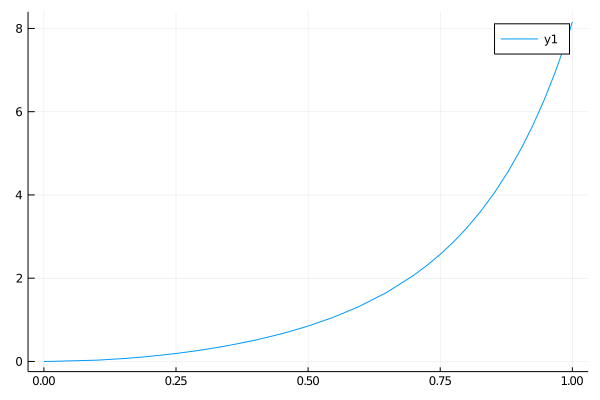

1.718281828459045

In [41]:
f(x) = 3x^2 * exp(x^3)
display(plot(f, 0, 1))
answer = ℯ - 1

In [74]:
function to_interval(x, a, b)
    return 0.5 * ( (b + a) + (b-a) * x)
end

to_interval (generic function with 1 method)

In [75]:
function fast_gauss_quadrature(f, N)
    nodes, weights = gausslegendre(N)
    out = 0.0
    for i in 1:N
        out += f(to_interval(nodes[i], 0, 1)) * weights[i]
    end
    out * 0.5
end

fast_gauss_quadrature (generic function with 1 method)

In [78]:
for n in 10 .^(0:7)
    t = @elapsed out = fast_gauss_quadrature(f, n)
    println("n=$n  | ", t,"      ", out,"      ", abs(out - answer))
end

n=1  | 1.522e-6      1.5308084989341916e-16      0.03183098861837922
n=10  | 5.378e-6      -0.04257356809918367      0.0107425794808046
n=100  | 6.348e-6      -0.03183098861837903      3.469446951953614e-17
n=1000  | 4.8568e-5      -0.03183098861837907      0.0
n=10000  | 0.000388307      -0.03183098861837899      7.632783294297951e-17
n=100000  | 0.003732715      -0.03183098861837899      7.632783294297951e-17
n=1000000  | 0.027084878      -0.03183098861838126      2.192690473634684e-15
n=10000000  | 0.330783949      -0.031830988618381524      2.456368441983159e-15


In [77]:
@time quadgk(f, 0, 1)

  0.062705 seconds (3.37 k allocations: 188.094 KiB)


(-0.03183098861837913, 3.900880771287758e-12)

In [24]:
@time fast_gauss_quadrature(f, 10000000)

  0.337477 seconds (10 allocations: 228.882 MiB, 2.03% gc time)


-7.940508434841085e-17